In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import classification_report, confusion_matrix,\
    accuracy_score, make_scorer
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.neural_network import MLPClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/UFF/TCC/Implementação/

/content/drive/MyDrive/UFF/TCC/Implementação


In [4]:
columns = ['sequence', 'frame', 'label', 'HeightWidthRatio',
           'MajorMinorRatio', 'BoundingBoxOccupancy', 'MaxStdXZ',
           'HHmaxRatio', 'H', 'D', 'P40']

df = pd.read_csv('urfall-cam0-falls.csv', names=columns)

df.sequence = df.sequence.str.replace('fall-', '')

df['label'] = [
    'Em pé' if a == -1
    else 'Deitado' if a == 1
    else 'Caindo'
    for a in df['label']
]

X = df.drop(columns=['label', 'sequence', 'frame'])
y = df['label']

# balanced_accuracy = (recall + specificity) / 2
metrics = ['f1_weighted', 'balanced_accuracy', 'accuracy']

## Distribuição de classes

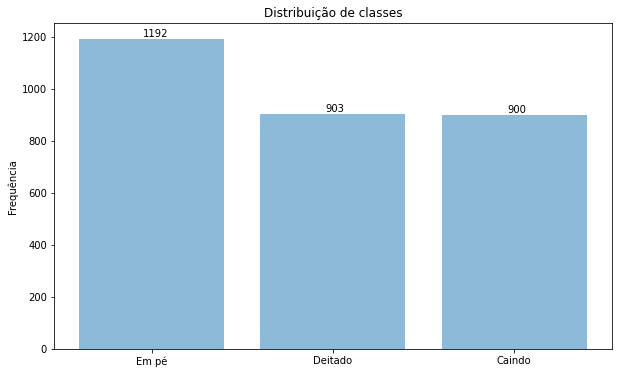

In [7]:
counts = y.value_counts()
bar_y = counts.index.to_list()
bar_x = counts.tolist()
y_pos = np.arange(len(bar_y))

plt.subplots(figsize=(10,6))
plt.bar(y_pos, bar_x, align='center', alpha = 0.5)
plt.xticks(y_pos, bar_y)
xlocs, xlabs = plt.xticks()
plt.ylabel('Frequência')
plt.title('Distribuição de classes')
for i, v in enumerate(bar_x):
    plt.text(xlocs[i] - 0.05 + i*0.006, v + 7, str(v))

In [8]:
# Variables for average classification report
originalclass = []
predictedclass = []

#Make our customer score
def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score

## MLP

In [10]:
for i in range(1,11):
    mpl = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(i*50,),
                    random_state=42)

    result = cross_validate(mpl, X, y, cv=10, scoring=metrics,
                            return_train_score=True, n_jobs=-1)
    print("Hidden Layers = " + str(mpl.hidden_layer_sizes[0]) + ":")

    print("\tf1:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_f1_weighted').mean()*100,
                std = result.get('test_f1_weighted').std()))

    print("\tbalanced accuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
        .format(mean = result.get('test_balanced_accuracy').mean()*100,
                std = result.get('test_balanced_accuracy').std()))

    print("\taccuracy:")
    print("\t\tmean = {mean:.2f}%;\n\t\tstd = {std:.2f};"
          .format(mean = result.get('test_accuracy').mean()*100,
                  std = result.get('test_accuracy').std()))

# best hidden layer size: 500

Hidden Layers = 50:
	f1:
		mean = 82.73%;
		std = 0.06;
	balanced accuracy:
		mean = 82.73%;
		std = 0.05;
	accuracy:
		mean = 83.81%;
		std = 0.05;
Hidden Layers = 100:
	f1:
		mean = 82.80%;
		std = 0.07;
	balanced accuracy:
		mean = 82.80%;
		std = 0.06;
	accuracy:
		mean = 83.71%;
		std = 0.06;
Hidden Layers = 150:
	f1:
		mean = 82.48%;
		std = 0.06;
	balanced accuracy:
		mean = 82.41%;
		std = 0.05;
	accuracy:
		mean = 83.44%;
		std = 0.06;
Hidden Layers = 200:
	f1:
		mean = 83.68%;
		std = 0.06;
	balanced accuracy:
		mean = 83.60%;
		std = 0.06;
	accuracy:
		mean = 84.58%;
		std = 0.06;
Hidden Layers = 250:
	f1:
		mean = 83.25%;
		std = 0.06;
	balanced accuracy:
		mean = 83.15%;
		std = 0.06;
	accuracy:
		mean = 84.24%;
		std = 0.06;
Hidden Layers = 300:
	f1:
		mean = 82.29%;
		std = 0.06;
	balanced accuracy:
		mean = 81.85%;
		std = 0.06;
	accuracy:
		mean = 82.91%;
		std = 0.06;
Hidden Layers = 350:
	f1:
		mean = 83.40%;
		std = 0.05;
	balanced accuracy:
		mean = 83.19%;
		std =

## MLP Report

In [11]:
mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(500,),
                    random_state=42)
acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 84.74%;	std = 0.05;
              precision    recall  f1-score   support

      Caindo       0.82      0.64      0.71       900
     Deitado       0.90      0.94      0.92       903
       Em pé       0.83      0.94      0.88      1192

    accuracy                           0.85      2995
   macro avg       0.85      0.84      0.84      2995
weighted avg       0.85      0.85      0.84      2995



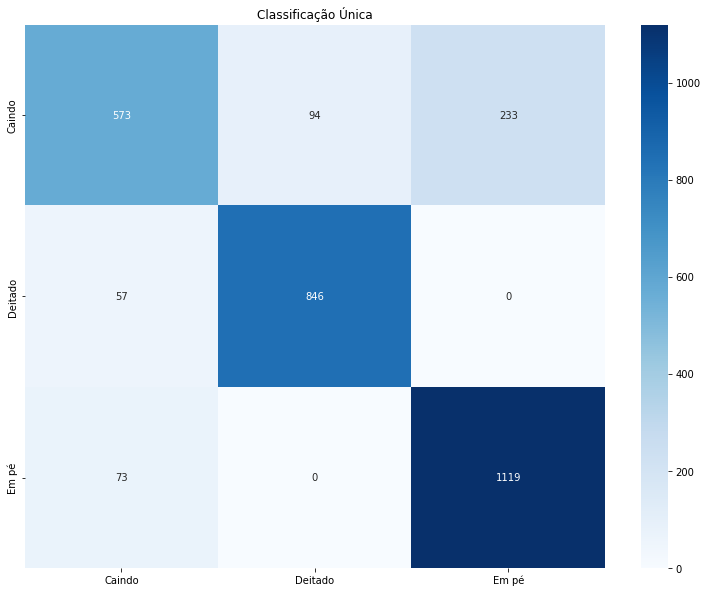

In [12]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Única')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)


In [13]:
originalclass = []
predictedclass = []

mlp = MLPClassifier(activation = 'logistic',
                    solver='adam',
                    alpha=1e-5,
                    learning_rate = 'invscaling',
                    max_iter = 500,
                    hidden_layer_sizes=(200,),
                    random_state=42)
acc = cross_val_score(mlp, X=X, y=y, cv=10,
                      scoring=make_scorer(
                          classification_report_with_accuracy_score
                      ))

print("Accuracy")
print("mean = {mean:.2f}%;\tstd = {std:.2f};"
      .format(mean = acc.mean()*100,
              std = acc.std()))

# Average values in classification report for all folds in a K-fold Cross-validation
print(classification_report(originalclass, predictedclass))

Accuracy
mean = 84.58%;	std = 0.06;
              precision    recall  f1-score   support

      Caindo       0.81      0.63      0.71       900
     Deitado       0.90      0.94      0.92       903
       Em pé       0.83      0.93      0.88      1192

    accuracy                           0.85      2995
   macro avg       0.85      0.84      0.84      2995
weighted avg       0.84      0.85      0.84      2995



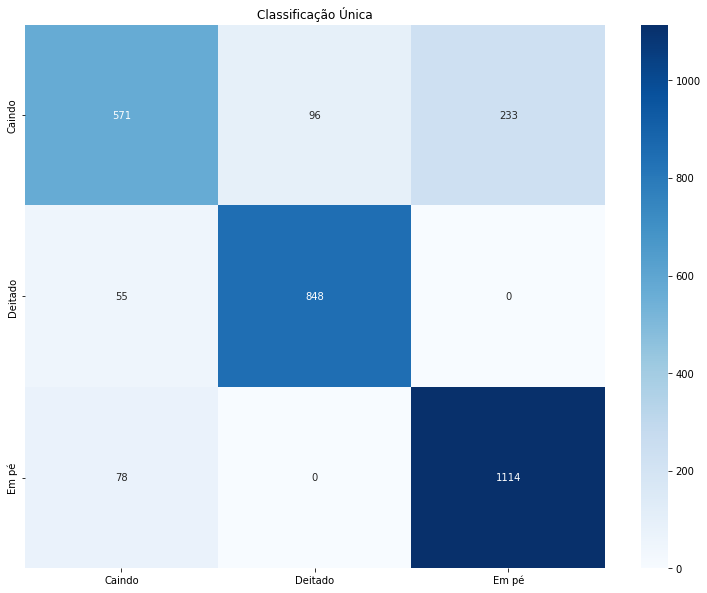

In [14]:
cf_matrix = confusion_matrix(originalclass, predictedclass)

categories = np.unique(y).tolist()
plt.figure(figsize=(13,10))
plt.title('Classificação Única')
sns.heatmap(cf_matrix, annot=True, fmt="", cmap='Blues', cbar=True, xticklabels=categories, yticklabels=categories)